<a href="https://colab.research.google.com/github/tanvi-ap/DEVINSC/blob/main/devinsc_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


**Import necessary libraries**

In [3]:
#for data
import pandas as pd 

#for github scraping
import os
import requests
import time
import sys
import json
from requests_oauthlib import OAuth1Session
from requests_oauthlib import OAuth1

#text preprocessing
import nltk
import string


from tqdm.auto import tqdm
from collections import Counter

from nltk import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


from gensim.models import Word2Vec

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

import re

import matplotlib.pyplot as plt
from wordcloud import WordCloud



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:


file_no=1

def gettoken():
  with open('/drive/MyDrive/token.txt', 'r') as token:
        gittoken = token.readline().replace("\n","")
  return gittoken

#print(gettoken())

def searchgit(fixes,commits):
    
    params = (
      ('q', fixes),('per_page',100) )
   
    headers = {'Accept': 'application/vnd.github.cloak-preview', 'Authorization': 'token ' + gettoken()}
    url = "https://api.github.com/search/commits"
  
    for i in range(0,100):
        print(i,fixes, commits)
        limit = 0
        while(limit == 0):
            response = requests.get(url,headers=headers,params=(('q',fixes),('per_page',100)))
            head = response.headers      
            if 'X-RateLimit-Remaining' in head:
                limit = int(head['X-RateLimit-Remaining'])
                if limit == 0:
                # Limit of requests per time was reached, sleep to wait until we can request again
                    print("Rate limit. Sleep.")
                    global file_no
                    file_no+=1
                    #file_name = '/drive/MyDrive/git_commits_XSS'+str(file_no)+'.json'
                    #file_name = '/drive/MyDrive/git_commits_SQL'+str(file_no)+'.json'
                    #file_name = '/drive/MyDrive/git_commits_Buffer'+str(file_no)+'.json'
                    file_name = '/drive/MyDrive/git_commits_Improperaccess'+str(file_no)+'.json'
                    print(file_name)
                    content= response.json()
                    with open(file_name, 'w') as commitfile:
                        json.dump(content, commitfile)  
                    time.sleep(35)  
        if 'Link' not in head:
            break;                  
                    
   
    
    # for j in range(0, len(content)):
    #     repo = content["items"][j]["repository"]["html_url"]
    

   


  
  


In [ ]:
commits = {}

#load previously scraped commits
'''
with open('/drive/MyDrive/git_commits_XSS.json','r') as jsonfile:
    data = jsonfile.read()
    commits= json.loads(data.decode("utf-8"))
'''   
#print(data)
    
#vulnerabilities = ["XSS","cross site","cross site request forgery"]   
#vulnerabilities = ["SQL","SQLI","injection"]
#vulnerabilities =["buffer","overflow","stack"]
vulnerabilities =["improper","unauthenticated","gain access","permission"]
#fixwords = ["prevent", "fix", "attack", "protect", "issue", "correct", "update", "improve", "change", "check", "malicious", "insecure", "vulnerable", "vulnerability"]
fixwords = ["malicious", "insecure", "vulnerable", "vulnerability","vulnerabilities"]

In [ ]:


#for all combinations of vulnerabilities and fixwords, scrape github 
for v in vulnerabilities:
  for fix in fixwords:
      searchgit(v + " " + fix, commits ); 

In [6]:
import glob

countxss = 0
countsqli = 0
countimproperaccess = 0
for file in glob.glob('/drive/MyDrive/git_commits_XSS*.json'):
    countxss+=1
    # print(file)

for file in glob.glob('/drive/MyDrive/git_commits_SQL*.json'):
    countsqli+=1

for file in glob.glob('/drive/MyDrive/git_commits_Improperaccess*.json'):
    countimproperaccess+=1
#
# print(countxss)
# print(countsqli)
# print(countimproperaccess)

In [ ]:
countxss

58

In [19]:
#extracting messages for xss

xss_msg=list()
filename_xss = list()

for i in range(2,countxss+2):
  with open('/drive/MyDrive/git_commits_XSS'+str(i)+'.json')as inputfile:
    data = json.load(inputfile)
    if i==5 or i==46 or i==49: #file numbers without any data because of limit exceeded error
      continue
    else:
     # print(i, len(data["items"]))
     for j in range(0,len(data["items"])):
       filename_xss.append( '/drive/MyDrive/git_commits_XSS'+str(i)+'.json')
       xss_msg.append(data["items"][j]["commit"]["message"])
#print(type(data))

final_data_xss= {'message':xss_msg,'type':'XSS','filename':filename_xss}
data_frame_xss = pd.DataFrame(final_data_xss)

#with open(/drive/MyDrive/git_commits_XSS'+str(i)+'.json)

In [8]:
data_frame_xss

,message,type,filename
0,Add parameterized queries to protect against m...,XSS,/drive/MyDrive/git_commits_XSS2.json
1,Replace malicious sql query\n\nLet's show an a...,XSS,/drive/MyDrive/git_commits_XSS2.json
2,Escaped query values to prevent SQL injection ...,XSS,/drive/MyDrive/git_commits_XSS2.json
3,setup a defence for malicious SQL injection,XSS,/drive/MyDrive/git_commits_XSS2.json
4,ecure/prevent sql malicious injection,XSS,/drive/MyDrive/git_commits_XSS2.json
...,...,...,...
5495,[NSE] Added http-csrf.nse that detects Cross S...,XSS,/drive/MyDrive/git_commits_XSS59.json
5496,[NSE] Added http-csrf.nse that detects Cross S...,XSS,/drive/MyDrive/git_commits_XSS59.json
5497,[NSE] Added http-csrf.nse that detects Cross S...,XSS,/drive/MyDrive/git_commits_XSS59.json
5498,[NSE] Added http-csrf.nse that detects Cross S...,XSS,/drive/MyDrive/git_commits_XSS59.json


In [ ]:
countsqli

44

In [20]:
#extracting messages for sql

sql_msg=list()
filename_sql = list()

for i in range(2,countsqli+2):
  with open('/drive/MyDrive/git_commits_SQL'+str(i)+'.json')as inputfile:
    data = json.load(inputfile)
    for j in range(0,len(data["items"])):
      filename_sql.append( '/drive/MyDrive/git_commits_SQL'+str(i)+'.json')
      sql_msg.append(data["items"][j]["commit"]["message"])

final_data_sql= {'message':sql_msg,'type':'SQLI','filename':filename_sql}
data_frame_sql = pd.DataFrame(final_data_sql)


In [21]:
#extracting messages for improper access

ia_msg=list()
filename_ia = list()

for i in range(2,countimproperaccess+2):
  with open('/drive/MyDrive/git_commits_Improperaccess'+str(i)+'.json')as inputfile:
    data = json.load(inputfile)
    if i==40:  #file numbers to ignore
      continue
    else:
      #print(i, len(data["items"]))
      for j in range(0,len(data["items"])):
        filename_ia.append( '/drive/MyDrive/git_commits_Improperaccess'+str(i)+'.json')
        ia_msg.append(data["items"][j]["commit"]["message"])

final_data_ia= {'message':ia_msg,'type':'ImproperAccess','filename':filename_ia}
data_frame_ia = pd.DataFrame(final_data_ia)


In [ ]:
data_frame_ia

,message,type,filename
0,Iranian Government-Sponsored APT Cyber Actors ...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess2.json
1,exiv2: Fix CVE-2021-3482\n\n References\n...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess2.json
2,exiv2: Fix CVE-2021-3482\n\n References\n...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess2.json
3,exiv2: Fix CVE-2021-3482\n\n References\n...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess2.json
4,exiv2: Fix CVE-2021-3482\n\n References\n...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess2.json
...,...,...,...
6195,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess64.json
6196,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess64.json
6197,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess64.json
6198,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess,/drive/MyDrive/git_commits_Improperaccess64.json


**Preprocessing Text**

In [22]:
#Create new data frame with selected features
df1 = data_frame_xss[['message','type']]
df2 = data_frame_sql[['message','type']]
df3 = data_frame_ia[['message','type']]



In [39]:
df = pd.concat([df1,df2,df3],ignore_index=True)
df = df.iloc[: , 1:]

In [40]:
df.tail()

,message,type
17195,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess
17196,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess
17197,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess
17198,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess
17199,Fix security vulnerability in DPMS\n\nChanged ...,ImproperAccess


In [42]:
df = df.apply(lambda x: ','.join(x.astype(str)), axis=1)

In [50]:
df_clean = pd.DataFrame({'text': df})

In [51]:
sent = [row.split(',') for row in df_clean['text']]

In [52]:
sent[:2]

[['Add parameterized queries to protect against malicious SQL injections',
  'XSS'],
 ["Replace malicious sql query\n\nLet's show an actual attack that loads username & password",
  'XSS']]

In [53]:
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [ ]:
model.wv.vocab

In [60]:
stop_words = set(stopwords.words('english'))

In [49]:
#Remove duplicate values if any from data
def duplicate_content_removal(data, col, ini_row):
    print("\nBefore removing duplicates, number of data was : ", ini_row)
    duplicate_count = data[col].duplicated().sum()
    print("\nNumber of Duplicates: ", duplicate_count)

    description_data = data[col].drop_duplicates()
    cleaned_row = len(description_data)
    
    if (ini_row - cleaned_row) > 0:
        print("\nTotal data reduction : ", (ini_row - cleaned_row))
        print("\nAfter removing duplicates, number of data is :", cleaned_row)
    else:
        print("\nDataset doesn't content any duplicate data.")
    
    return list(description_data)

In [55]:
msg=duplicate_content_removal(df_clean, 'text', data_frame_xss.shape[0])


Before removing duplicates, number of data was :  5500

Number of Duplicates:  16112

Total data reduction :  4412

After removing duplicates, number of data is : 1088


In [56]:
def remove_link_punc(string):
    # removing links
    temp_string = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', string)

    # removing all everything except a-z english letters
    regex = re.compile('[^a-zA-Z]')
    temp_string = regex.sub(' ', temp_string)

    # removing extra spaces
    clean_string = re.sub(' +', ' ', temp_string).lower()    

    return clean_string

In [57]:
lemmatizer = WordNetLemmatizer()

In [58]:
def data_cleaning(content):
    sentences = []
    for idx in tqdm(range(len(content))):
        
        if content[idx] !="":
            # Sentence tokenization using NLTK library
            for each_sent in  sent_tokenize(str(content[idx])):
                
                if each_sent != "":
                    temp_sent = []
                    # Removing link and punctuation
                    each_sent = remove_link_punc(each_sent.lower())

                    # Removing stopwords and applying lemmatization
                    for each_word in each_sent.split():
                        if each_word not in stop_words and len(each_word)>= 3:
                            temp_sent.append(lemmatizer.lemmatize(each_word))

                    # Only taking word list length is greater than equals to 5
                    if len(temp_sent) >= 5:
                        sentences.append(temp_sent)
    
    return sentences

In [61]:
sent_corpus = data_cleaning(msg)

  0%|          | 0/1088 [00:00<?, ?it/s]

In [62]:
sent_corpus[0]

['add',
 'parameterized',
 'query',
 'protect',
 'malicious',
 'sql',
 'injection',
 'x']

In [63]:
len_count = []
for l in sent_corpus:
    len_count.append(len(l))

print("Total number of Sentences : ", len(len_count))
word_sent_df = pd.DataFrame(sorted(Counter(len_count).items()), columns=["No of Words in each Sentence","No of sentence"])
word_sent_df.head(10)

Total number of Sentences :  3236


,No of Words in each Sentence,No of sentence
0,5,284
1,6,283
2,7,264
3,8,227
4,9,208
5,10,187
6,11,171
7,12,144
8,13,137
9,14,120


In [ ]:
xss_message=duplicate_content_removal(data_frame_xss, 'message', data_frame_xss.shape[0])

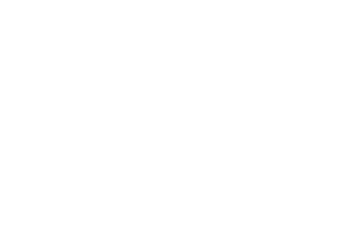

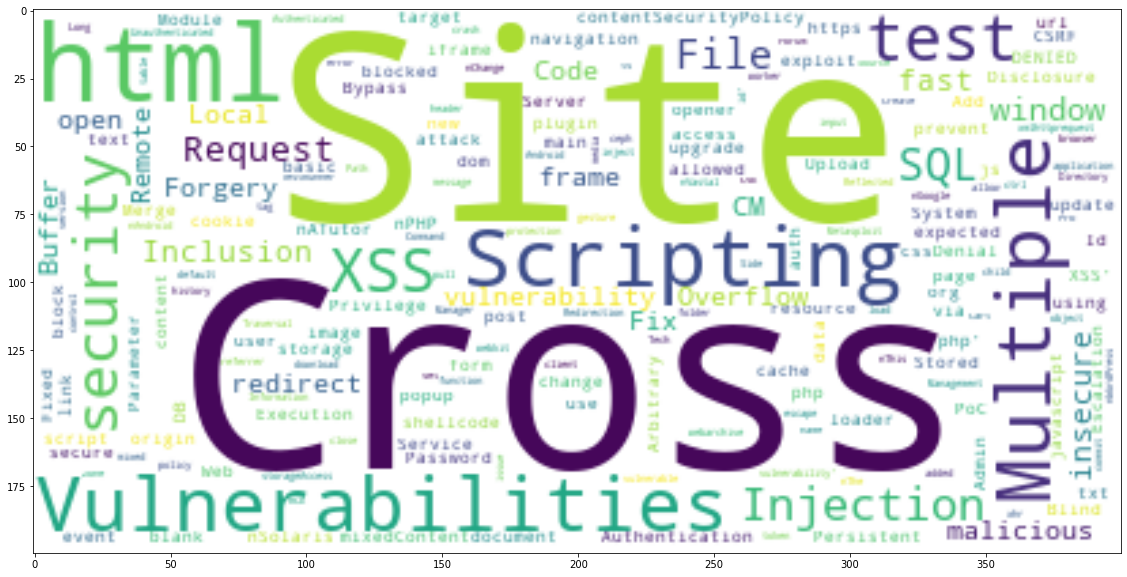

In [70]:

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str(xss_message))
plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()



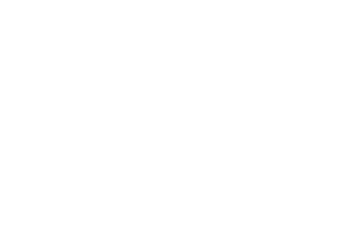

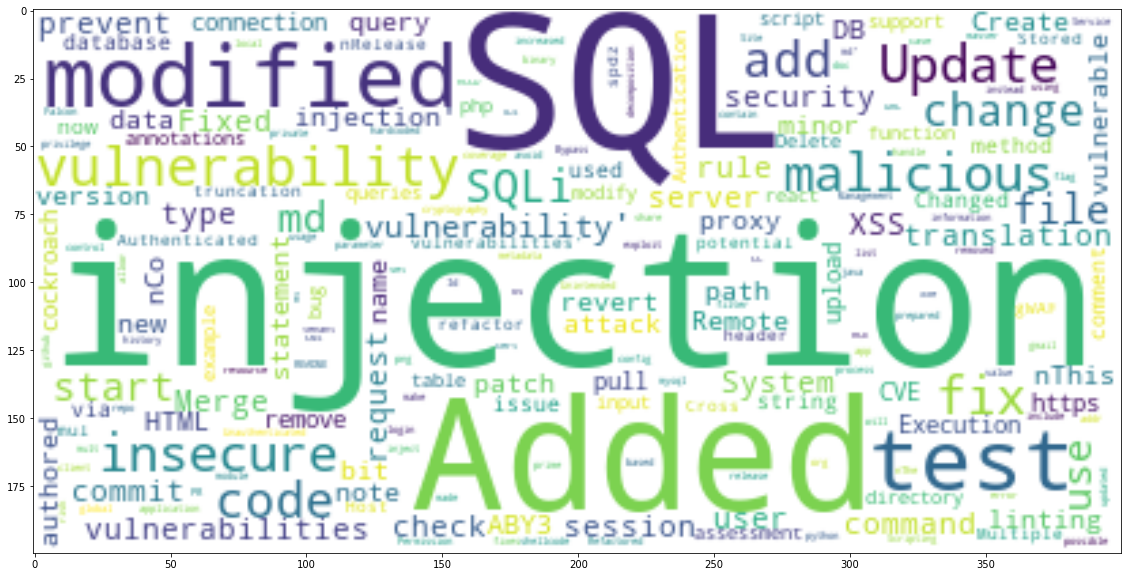

In [ ]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(str(sql_message))
plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()


In [ ]:
def cal_elapsed_time(s):
    return print("Elapsed time:\t", round((time.time() - s),2))
s_time = time.time()
cal_elapsed_time(s=s_time)

Elapsed time:	 0.0


In [ ]:
from gensim.models import Word2Vec

In [ ]:
s_time = time.time()
print("Model Training Started...")
model = Word2Vec(sentences=sent_corpus, size=200, window=4, min_count=1, workers=4)
cal_elapsed_time(s_time)

Model Training Started...
Elapsed time:	 6.03


In [ ]:
print("Total number of unique words loaded in Model : ", len(model.wv.vocab))

Total number of unique words loaded in Model :  10733


In [ ]:
model.wv.vocab

In [ ]:
# Saving the model
model.save("/drive/MyDrive/trained_model.model")

In [ ]:
model = Word2Vec.load("/drive/MyDrive/trained_model.model")

In [ ]:
# Find similar words for efficiency
model.wv.most_similar("injection")

[('sql', 0.9174954891204834),
 ('gazie', 0.9151500463485718),
 ('sideid', 0.9143936038017273),
 ('facade', 0.8883045315742493),
 ('fastpublish', 0.8861846923828125),
 ('execution', 0.8851046562194824),
 ('pageid', 0.8812585473060608),
 ('supplying', 0.8763076066970825),
 ('txtbb', 0.8758971691131592),
 ('authenticated', 0.874728262424469)]

In [ ]:
# List of word similarity
model.wv.n_similarity(['malicious','attack'],['vulnerability','insecure'])

0.78979546

In [ ]:
model.wv.distance("malicious", "attack")

0.20718306303024292

In [ ]:
# look up top 6 words similar to 'database'
w1 = ["malicious"]
model.wv.most_similar (positive=w1,topn=6)

[('inserting', 0.8652040958404541),
 ('executed', 0.8595423698425293),
 ('rotate', 0.8513879776000977),
 ('attacker', 0.8433330655097961),
 ('query', 0.8361366391181946),
 ('txtbb', 0.8216421604156494)]

In [ ]:
model.predict_output_word(['CVE','attack'],topn=3)

[('version', 0.0010124235),
 ('fix', 0.0010046238),
 ('unauthenticated', 0.0009033962)]

**References**:
1. https://towardsdatascience.com/introduction-to-git-data-extraction-and-analysis-in-python-e7e2bf9b4606
2. https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a
3. https://towardsdatascience.com/nlp-preprocessing-with-nltk-3c04ee00edc0
4. https://medium.com/swlh/how-to-train-word2vec-model-using-gensim-library-115b35440c90
5. Keywords related to vulnerabilities: [Identifying the characteristics of vulnerable code changes: an empirical study](https://www.researchgate.net/figure/Keywords-Associated-with-Vulnerabilities_tbl1_286077750)
6. [All the Things You Can Do With GitHub API and Python](https://towardsdatascience.com/all-the-things-you-can-do-with-github-api-and-python-f01790fca131)